# Normal Distribution

## Overview

In this chaper we will discuss the normal or <a href="https://en.wikipedia.org/wiki/Normal_distribution">Gaussian distribution</a>. 
The Gaussian distribution is perhaps the most widedly used distribution in statistics. There are several reason for this:

- It can be specified using only two parameters, mean and variance, which are easy to interpret
- The <a href="https://en.wikipedia.org/wiki/Central_limit_theorem">CLT</a> tells us that the sums of independent random variables have an approximately Gaussian distribution. Thus, it is a good choice to model residual errors or noise
- The Gaussian distribution makes the least number of assumptions (has maximum entropy) subject to the constraint of having a specified mean and variance.

One probem with the Gaussian distribution is that it is sensitive to outliers since the log-probability only decays quadratically with distance from the center.

## The normal distribution

For 1D data, the normal distribution is characterised by the following PDF, see e.g. [1]

\begin{equation}
p(x) = \frac{1}{(2 \pi \sigma^2)^{1/2}}exp\left(- \frac{1}{2\sigma^2} (x - \mu)^2 \right)
\label{eq:eq1}\tag{1}
\end{equation}

This PDF depends only on two parameters; the mean $\mu$ and the variance $\sigma^2$. 

----
**Remark:** Precision


The inverse of the variance

$$\beta = \frac{1}{\sigma^2}$$

is called the precision

----

Let's use Python to plot the PDF above. 

In [22]:
import numpy as np
import matplotlib.pyplot as plt


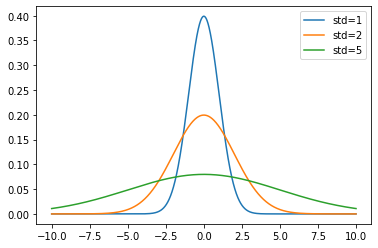

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(-10, 10, 0.01)

# Calculating mean 
mean = np.mean(x_axis)

plt.plot(x_axis, norm.pdf(x_axis, mean, 1), label="std=1")
plt.plot(x_axis, norm.pdf(x_axis, mean, 2), label="std=2")
plt.plot(x_axis, norm.pdf(x_axis, mean, 5), label="std=5")
plt.legend(loc="upper right")
plt.show()


The PDF of the normal distribution is symmetric about the mean. Thus, the normal distribution is can be used to describe picked symmetric data. Furthermore, 
many of the statistical procedures we use, assume normality of the data. 
Observe that the higher the standard deviation, the more flat the distribution appears to be. Consequently, the higher the variance the more spread the data will have around the mean.
In addition, notice that $p(x) > 0, \forall x$ and that 

\begin{equation}
\int_{-\infty}^{+ \infty} p(x) dx = 1
\end{equation}

Therefore $\ref{eq1}$ is a valid probability density. In can be shown that 

\begin{equation}
E \left[x\right] = \int_{-\infty}^{+ \infty} p(x) x dx = \mu
\label{eq:eq2}\tag{2}
\end{equation}

\begin{equation}
Var \left[x\right] = \sigma^2
\label{eq:eq3}\tag{3}
\end{equation}

Moreover, given that the gaussian distribution is symmetric the median coincides with the mean $\mu$. Also note that the maximum of the function appears at $x=\mu$.

One thing we should be aware with the normal distribution is that the tails appear to have a really small probability. 
Hence, modeling outliers is not easy i.e. when dealing with outliers the normal distribution might not be the best description of the data.

## Maximum likelihood estimates

For most applications, we will not know $\mu$ or $\sigma$ or both. Instead we will have a data sample available. 
How can we estimate $\mu$ and $\sigma$? Let's assume that the observations we have available 
are all drawn from the same distribution and that they are independent.  For the normal distribution, the joint probability of observing the data is 

\begin{equation}
p(\mathbf{x}| \mu, \sigma) = \prod_{i}^{N} p(x_i)
\label{eq:eq4}\tag{4}
\end{equation}

----

**Remark** 

One very common way of determining the parameters in a probability distribution using the observed data is to find the the parameter values that maximize
the likelihood function [1]. Another approach could have been to maximize the probability of the parameters given the data.

----

Maximizing the function above is easier if we take its log. Since the logarithm is a monotonically increasing 
function of its argument, this operation will be equivalent to maximizing the function itself [1]. Applying the log transform we can show the following MLE parameters

\begin{equation}
\mu_{MLE} = \frac{1}{N} \sum_{i}^{N} xi
\label{eq:eq5}\tag{5}
\end{equation}

\begin{equation}
\sigma^{2}_{MLE} = \frac{1}{N} \sum_{i}^{N} \left(xi - \mu_{MLE} \right)^2
\label{eq:eq6}\tag{6}
\end{equation}

We can show that $\mu_{MLE}$ is an unbiased estimator of $\mu$ i.e.

\begin{equation}
E\left[\mu_{MLE}\right] = \mu
\label{eq:eq7}\tag{7}
\end{equation}

However, this is not the case for $\sigma^{2}_{MLE}$. In this case

\begin{equation}
E\left[\sigma^{2}_{MLE}\right] = \frac{N-1}{N}\sigma^{2}
\label{eq:eq8}\tag{8}
\end{equation}

An unbiased estimate instead would have been 

\begin{equation}
\sigma^{2} = \frac{1}{N - 1} \sum_{i}^{N} \left(xi - \mu_{MLE} \right)^2 = \frac{N}{N-1}\sigma^{2}
\label{eq:eq9}\tag{9}
\end{equation}

## Multi-dimensional data

In many applications, the data we are working with is $D-$ dimensional. For such data, We can specify the PDF for the normal distribution using the 
mean vector $\boldsymbol{\mu}$ and the $D \times D $covariance matrix $\Sigma$ as follows, see e.g. [1]

\begin{equation}
p(\mathbf{x}) = \frac{1}{(2 \pi )^{D/2} det(\Sigma)^{D/2}}exp\left(-\frac{1}{2}(\mathbf{x} - \boldsymbol{\mu})^T\Sigma^{-1}(\mathbf{x} - \boldsymbol{\mu}) \right)
\label{eq:eq10}\tag{10}
\end{equation}

Let's use Python to explore the $D-$dimensional normal distribution. For proctical reasons we will assume $D=2$.

In [24]:
mean = [0, 0]
cov = [[1, 0], [0, 100]]  

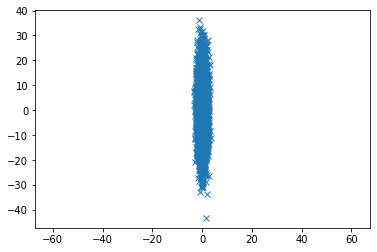

In [25]:
x, y = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [26]:
cov2 = [[5, 0], [0, 5]]  

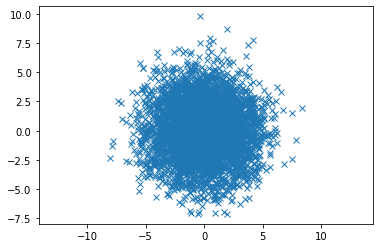

In [27]:
x, y = np.random.multivariate_normal(mean, cov2, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

In [28]:
cov3 = [[5, 2.5], [2.5, 5]]  

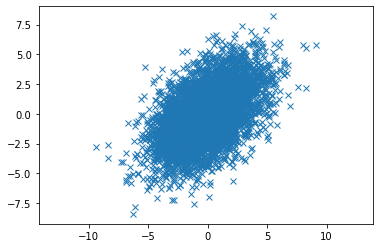

In [29]:
x, y = np.random.multivariate_normal(mean, cov3, 5000).T
plt.plot(x, y, 'x')
plt.axis('equal')
plt.show()

We can see when both variables have the same variance and their covariance is zero then the distribution approximates a circle. 
In cotrast, when the variance of one variable is very different from the variance of the other, the distribution approximates and ellipsis. Introducing,
covariance shifts the axis of the ellipsis.

## Summary

In this section we reviewed the normal of Gaussian distribution. This distribution is widedly used in practical applications.
It can be fully specified using two parameters; $\mu$ and $\sigma^{2}$. Typically, we will not know these parameters and therefore we will have to estimate them 
from the available data. There are various methodologies we can use in order to do so. In this section we obtained
maximum likelihood estimates i.e. the estimated parameters maximize the probability of observing the data i.e. the joing probability distribution. The estimate for the
mean was also shown to be unbiased. However, this is not the case for the variance estimate. Finally, we introduced the normal distribution for $D-$ dimensional data.

## References

1. Christopher M. Bishop, _Pattern Recognition and Machine Learning_ Springer, 2006.